# Predicting Hospital Readmission for Diabetes Patients 

### Project Overview
This project seeks to identify key factors contributing to the high 30-day readmission rates among diabetic patients. By analyzing these factors, we aim to create a predictive model capable of identifying high-risk patients likely to be readmitted. This will empower healthcare providers to improve care quality, enhance patient experiences, foster better population health, and lower costs related to readmissions. Additionally, the project will assess the effectiveness of various diabetes medications in managing the condition.

### Dataset
The dataset includes detailed information about diabetic patients, such as demographic data, medical histories, clinical measurements, prescribed medications, and 30-day readmission statuses. This comprehensive dataset is crucial for analyzing the factors influencing readmissions and evaluating the efficacy of diabetes treatments.

## Project Objectives

### Data Exploration
Conduct exploratory data analysis (EDA) to understand the dataset and uncover patterns.
Investigate factors associated with readmissions and assess the distribution and effectiveness of different medications.

### Data Preprocessing
Address missing data, encode categorical variables, and normalize or scale numerical features.
Ensure the dataset is properly prepared for analysis and model training.

### Feature Selection
Use techniques such as correlation analysis or feature importance rankings to identify the most critical factors driving readmissions.
Prioritize these features for inclusion in the predictive model.

### Predictive Modeling
Develop a machine learning model (e.g., logistic regression, decision trees, random forest, or gradient boosting) to estimate the likelihood of 30-day readmissions.
Train the model using the prepared dataset and evaluate its performance with metrics like accuracy, precision, recall, and F1 score.

### Medication Effectiveness Analysis
 Evaluate the impact of various diabetes medications on readmission rates.
Identify treatments that yield the best outcomes in reducing hospital readmissions.

### Model Evaluation and Optimization
 Validate the model using cross-validation techniques to ensure robustness and generalizability.
Fine-tune hyperparameters and explore alternative algorithms to maximize performance.

### Recommendations and Insights
Summarize findings to highlight key factors influencing readmissions and effective medications.
Provide actionable recommendations to healthcare providers to enhance patient care and reduce readmission rates.

### Conclusion
This project aims to uncover the underlying causes of high 30-day readmission rates among diabetic patients and provide actionable insights. By leveraging a predictive model, healthcare providers can proactively identify high-risk patients and allocate resources more effectively. The medication analysis will guide treatment decisions, improving patient outcomes and care quality. Ultimately, this data-driven approach aims to enhance patient experiences, promote better health outcomes, and reduce healthcare costs.eed any further adjustments!

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', None)

### Importation of Data

In [2]:

df = pd.read_csv(r'C:\Users\ADMIN\Documents\Diff. format of files\diabetes_Patients_Hosp_Readmission dataset.csv')

### Displaying the first five rows

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Data Inspection

### Checking the Shape

In [4]:
df.shape

(101766, 50)

### Checking vital information of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### Categorical Data Insights

In [6]:
data = [df]
for dataset in data:
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (df[col].value_counts())


Frequency of Categories for variable race
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

Frequency of Categories for variable gender
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

Frequency of Categories for variable age
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

Frequency of Categories for variable weight
weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

Frequency of Categories for variable payer_code
payer_code
?     40256
MC    32439
HM     6274
SP     

###  Dropping "Weight", "payer_code" and "medical_specialty" column due to large missing values

In [7]:
df= df.drop(['weight','payer_code','medical_specialty'],axis=1)


In [8]:
df.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    3
A1Cresult                        3
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride                      4
acetohexamide                    2
glipizide                        4
glyburide           

### Exploring "Readmitted" column

In [9]:
df['readmitted']

0          NO
1         >30
2          NO
3          NO
4          NO
         ... 
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101766, dtype: object

In [10]:
df[['readmitted']].nunique()

readmitted    3
dtype: int64

### There are 3 unique values there which are: 'NO','<30','>30'
### Converting to numerical variable


In [11]:
df['readmitted']=df['readmitted'].replace('>30',0)
df['readmitted']=df['readmitted'].replace('<30',1)
df['readmitted']=df['readmitted'].replace('NO',0)

In [12]:
df.groupby('readmitted').size()

readmitted
0    90409
1    11357
dtype: int64

In [13]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0


### Replacing "?" with NaN in the specified columns

In [14]:
df.replace("?", pd.NA, inplace=True)

### Droping rows with missing values in the specified columns

In [15]:

df.dropna(subset=["diag_1", "diag_2", "diag_3", "race"], inplace=True)


### Reseting the index of the dataset

In [16]:
df.reset_index(drop=True, inplace=True)

### Checking for missing values in dataset
### In the dataset missing values are represented as '?' 

In [17]:
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 0
gender 0
age 0
diag_1 0
diag_2 0
diag_3 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0


### Dropping rows with "Unknown/Invalid" in the gender column

In [18]:
df = df[df['gender'] != 'Unknown/Invalid']

### Resetting the index of dataset

In [19]:
df.reset_index(drop=True, inplace=True)

### Detailed Frequency Distribution of Categorical Columns

In [20]:
data = [df]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    #Print frequency of categories
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (df[col].value_counts())


Frequency of Categories for variable race
race
Caucasian          75079
AfricanAmerican    18881
Hispanic            1984
Other               1483
Asian                625
Name: count, dtype: int64

Frequency of Categories for variable gender
gender
Female    52833
Male      45219
Name: count, dtype: int64

Frequency of Categories for variable age
age
[70-80)     25305
[60-70)     21809
[80-90)     16702
[50-60)     16697
[40-50)      9265
[30-40)      3548
[90-100)     2717
[20-30)      1478
[10-20)       466
[0-10)         65
Name: count, dtype: int64

Frequency of Categories for variable diag_1
diag_1
428    6730
414    6373
786    3900
410    3514
486    3412
       ... 
216       1
V43       1
838       1
955       1
V51       1
Name: count, Length: 713, dtype: int64

Frequency of Categories for variable diag_2
diag_2
428    6517
276    6513
250    5412
427    4919
401    3613
       ... 
316       1
963       1
506       1
944       1
927       1
Name: count, Length: 740, dtype:

In [21]:
df.shape

(98052, 47)

## Exploratory Data Analysis

### Pairwise Relationships Among Numerical Features

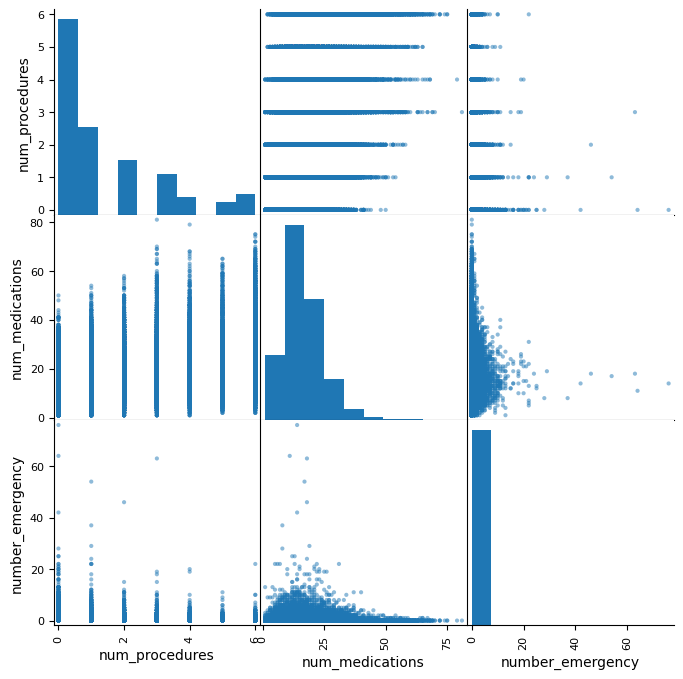

In [22]:
sm = pd.plotting.scatter_matrix(df[['num_procedures', 'num_medications', 'number_emergency']], figsize = (8, 8))
sns.despine()

### Distribution of Medications with Age

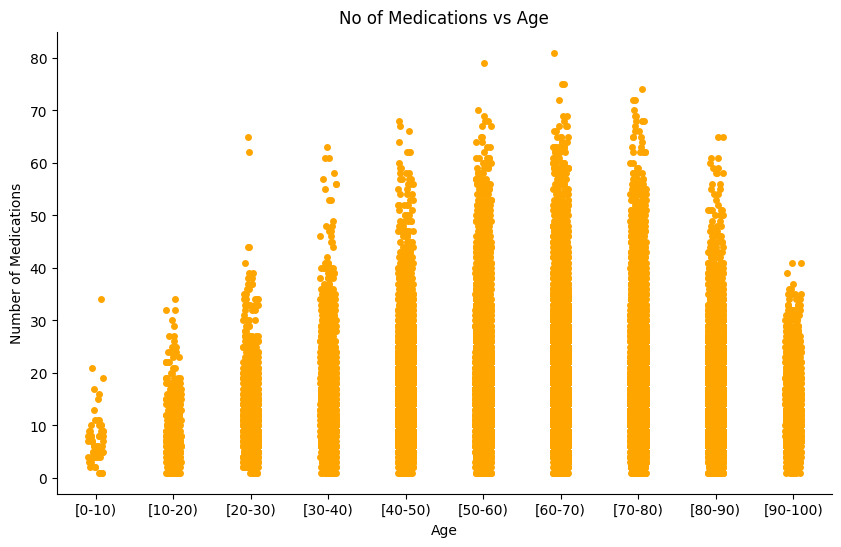

In [23]:
sortage = df.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'orange')
sns.despine()
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('No of Medications vs Age')
plt.show()

### Gender Readmission Rate

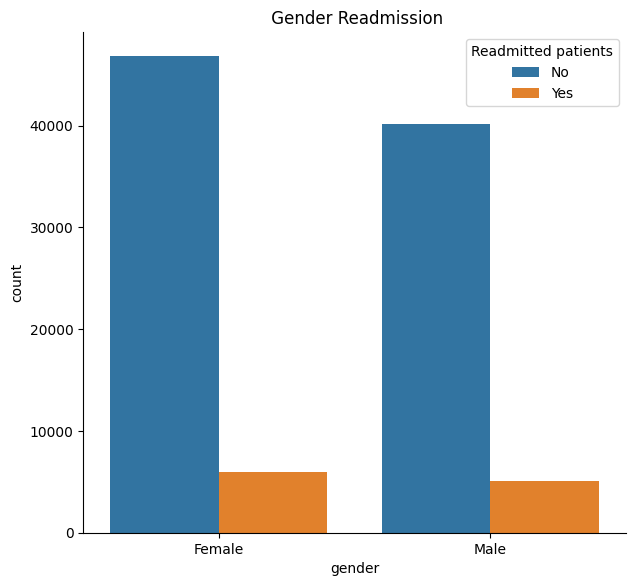

In [24]:
plot1 = sns.countplot(x = 'gender', hue = 'readmitted', data = df) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title(' Gender Readmission')
plt.show()

### Age Vs Readmission

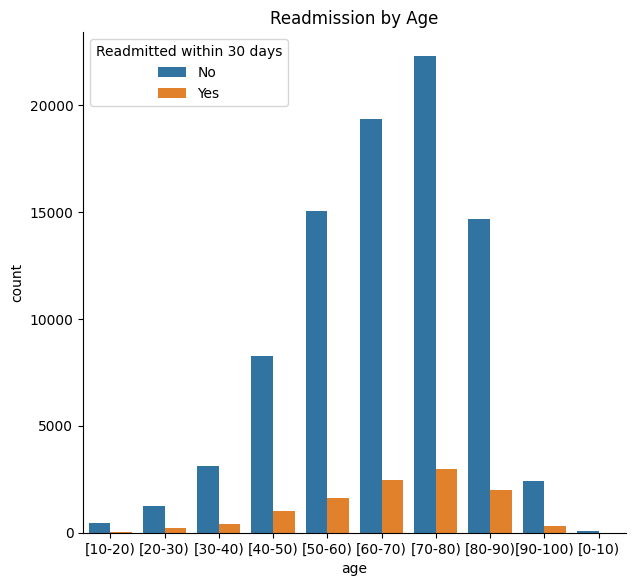

In [25]:
ageplt = sns.countplot(x = 'age', hue = 'readmitted', data = df) 

sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Readmitted within 30 days', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmission by Age')
plt.show()

### Plotting the numerical variables in the dataset

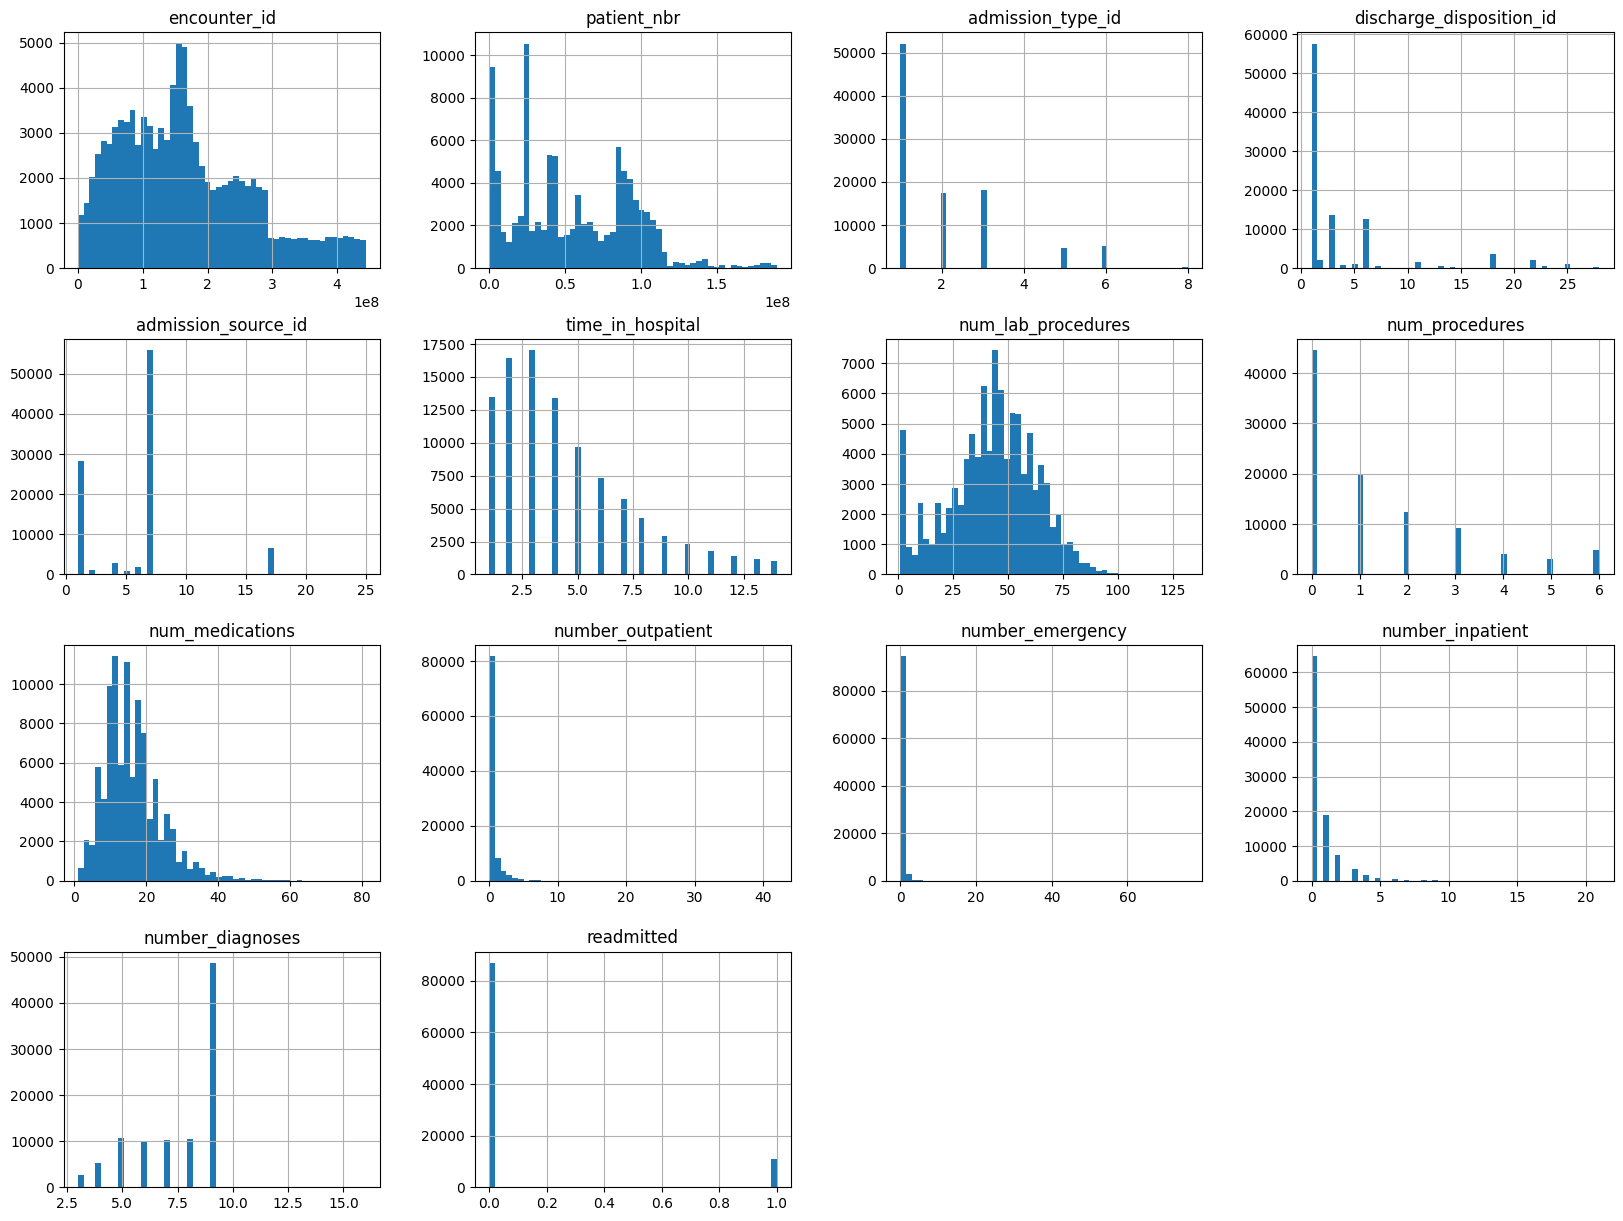

In [26]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Exploring the categorical variables

<Axes: xlabel='age', ylabel='count'>

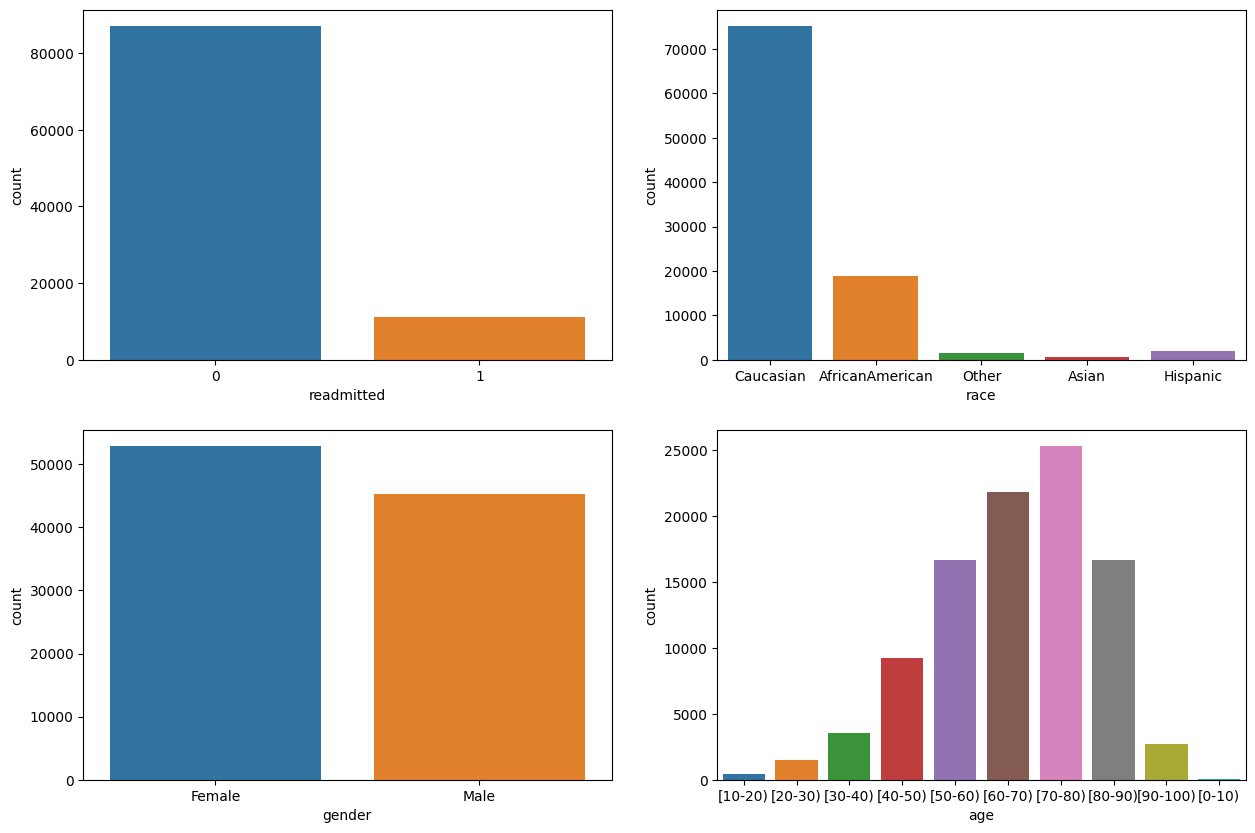

In [27]:
fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)

sns.countplot(x="readmitted", data=df, ax=ax[0][0])
sns.countplot(x="race", data=df, ax=ax[0][1])
sns.countplot(x="gender", data=df, ax=ax[1][0])
sns.countplot(x="age", data=df, ax=ax[1][1])

In [28]:
df['race']

0              Caucasian
1        AfricanAmerican
2              Caucasian
3              Caucasian
4              Caucasian
              ...       
98047    AfricanAmerican
98048    AfricanAmerican
98049          Caucasian
98050          Caucasian
98051          Caucasian
Name: race, Length: 98052, dtype: object

### Converting race categories with Numerical values

In [29]:
df['race'] = df['race'].replace({
    'AfricanAmerican': 0,
    'Caucasian': 1,
    'Asian': 2,
    'Hispanic': 3,
    'Other': 4
})

### Replacing categorical insulin values with numerical values

In [30]:
df['insulin'] = df['insulin'].replace({
    'No': 0,
    'Steady': 1,
    'Down': 2,
    'Up': 3
})


### Encoding Metformin-Rosiglitazone Status

In [31]:
df['metformin-rosiglitazone'] = df['metformin-rosiglitazone'].replace({'No': 0})

### Encoding citoglipton Status

In [32]:
df['citoglipton']=df['citoglipton'].replace('No',0)

### Encoding Examide Status

In [33]:
df['examide']=df['examide'].replace('No',0)

### Encoding diabetesMed Status

In [34]:
df['diabetesMed']=df['diabetesMed'].replace('No',0)
df['diabetesMed']=df['diabetesMed'].replace('Yes',1)

### Encoding change Status

In [35]:
df['change']=df['change'].replace('No',0)
df['change']=df['change'].replace('Ch',1)

In [36]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# List of columns to encode
columns_to_encode = [
    'age', 'gender', 'diag_1', 'diag_2', 'diag_3', 
    'max_glu_serum', 'A1Cresult', 'metformin', 
    'repaglinide', 'nateglinide', 'chlorpropamide', 
    'glimepiride', 'acetohexamide', 'glipizide', 
    'glyburide', 'tolbutamide', 'pioglitazone', 
    'rosiglitazone', 'acarbose', 'miglitol', 
    'troglitazone', 'tolazamide', 'glyburide-metformin', 
    'glipizide-metformin', 'metformin-pioglitazone', 
    'glimepiride-pioglitazone', 'insulin', 'change'
]

# Apply LabelEncoder to each column
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

In [37]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,1,0,1,1,1,7,3,59,0,18,0,0,0,143,77,121,9,3,3,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,1,1,0
1,64410,86047875,0,0,2,1,1,7,2,11,5,13,2,0,1,454,76,763,6,3,3,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,500364,82442376,1,1,3,1,1,7,2,44,1,16,0,0,0,553,95,248,7,3,3,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,1,1,0
3,16680,42519267,1,1,4,1,1,7,1,51,0,8,0,0,0,54,23,86,5,3,3,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0
4,35754,82637451,1,1,5,2,1,2,3,31,6,16,0,0,0,263,244,86,9,3,3,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0


### Identifying Numerical and Categorical columns

In [38]:
numcolumn = df.select_dtypes(include = [np.number]).columns
objcolumn = df.select_dtypes(include = ['object']).columns

### Handling missing values in numerical and categorical column

In [39]:
# Fill missing values in numerical columns with 0
df[numcolumn] = df[numcolumn].fillna(0)

# Fill missing values in categorical columns with "unknown"
df[objcolumn] = df[objcolumn].fillna("unknown")

In [40]:
#Encoding the data,

def map_now():
    listname = [
        ('infections', 139),
        ('neoplasms', (239 - 139)),
        ('endocrine', (279 - 239)),
        ('blood', (289 - 279)),
        ('mental', (319 - 289)),
        ('nervous', (359 - 319)),
        ('sense', (389 - 359)),
        ('circulatory', (459 - 389)),
        ('respiratory', (519 - 459)),
        ('digestive', (579 - 519)),
        ('genitourinary', (629 - 579)),
        ('pregnancy', (679 - 629)),
        ('skin', (709 - 679)),
        ('musculoskeletal', (739 - 709)),
        ('congenital', (759 - 739)),
        ('perinatal', (779 - 759)),
        ('ill-defined', (799 - 779)),
        ('injury', (999 - 799))
    ]
    
    dictcout = {}
    count = 1
    for name, num in listname:
        dictcout.update({str(count): name} * num)
        count += num  # Increment count by the number of occurrences
    return dictcout


def codemap(df, codes):
    import pandas as pd
    
    # Get the list of column names
    namecol = df.columns.tolist()
    
    for col in namecol:
        temp = []
        for num in df[col]:
            if num is None or num in ['unknown', '?'] or pd.isnull(num):
                temp.append('unknown')
            elif num.upper().startswith('V'):
                temp.append('supplemental')
            elif num.upper().startswith('E'):
                temp.append('injury')
            else:
                lkup = num.split('.')[0]
                temp.append(codes.get(lkup, 'unknown'))  # Use .get() to handle missing keys
        df[col] = temp  # Assign the transformed list back to the column
    return df



In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,98052.0,1.658301e+08,1.024325e+08,12522.0,85285590.0,153302547.0,230501760.0,443867222.0
patient_nbr,98052.0,5.484745e+07,3.866167e+07,135.0,23502339.0,46876099.5,88003062.0,189502619.0
race,98052.0,8.996553e-01,6.371253e-01,0.0,1.0,1.0,1.0,4.0
gender,98052.0,4.611737e-01,4.984928e-01,0.0,0.0,0.0,1.0,1.0
age,98052.0,6.126025e+00,1.559081e+00,0.0,5.0,6.0,7.0,9.0
admission_type_id,98052.0,2.025803e+00,1.450121e+00,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,98052.0,3.753396e+00,5.309412e+00,1.0,1.0,1.0,4.0,28.0
admission_source_id,98052.0,5.776741e+00,4.071632e+00,1.0,1.0,7.0,7.0,25.0
time_in_hospital,98052.0,4.422011e+00,2.993070e+00,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,98052.0,4.314846e+01,1.971176e+01,1.0,31.0,44.0,57.0,132.0


In [42]:
data1 = df.drop(['encounter_id', "patient_nbr", 'admission_type_id'], axis =1) 

In [43]:
data1.head()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,1,0,1,1,7,3,59,0,18,0,0,0,143,77,121,9,3,3,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,1,1,0
1,0,0,2,1,7,2,11,5,13,2,0,1,454,76,763,6,3,3,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,1,3,1,7,2,44,1,16,0,0,0,553,95,248,7,3,3,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,1,1,0
3,1,1,4,1,7,1,51,0,8,0,0,0,54,23,86,5,3,3,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0
4,1,1,5,1,2,3,31,6,16,0,0,0,263,244,86,9,3,3,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0


## Data Normalization

In [44]:
listnormalization = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

from sklearn.preprocessing import StandardScaler

normal = StandardScaler()

data1[listnormalization] = normal.fit_transform(data1[listnormalization])

data1.describe()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,9.805200e+04,9.805200e+04,9.805200e+04,9.805200e+04,9.805200e+04,9.805200e+04,9.805200e+04,98052.000000,98052.000000,98052.000000,9.805200e+04,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.000000,98052.0,98052.0,98052.000000,98052.000000,98052.000000,98052.000000,98052.0,98052.000000,98052.000000,98052.000000,98052.000000
mean,0.899655,0.461174,6.126025,3.753396,5.776741,9.275636e-18,-1.820344e-16,1.101482e-17,1.159455e-16,-5.565382e-17,-6.145109e-17,-1.304386e-17,337.624240,274.955085,280.592114,-1.298589e-16,2.904816,2.681394,1.195407,1.015706,1.007057,1.000887,1.050320,0.000010,1.121905,1.101742,0.000224,1.072349,1.062946,1.003090,1.000316,0.000031,0.000388,0.0,0.0,0.874546,1.006823,0.000133,0.000010,0.0,0.000010,0.461775,0.768470,0.112858
std,0.637125,0.498493,1.559081,5.309412,4.071632,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,159.449319,151.144566,175.386124,1.000005e+00,0.447013,0.774374,0.434980,0.136235,0.087757,0.032083,0.240763,0.003194,0.365266,0.344238,0.014977,0.272198,0.253470,0.057843,0.020939,0.005531,0.020194,0.0,0.0,1.009070,0.083427,0.011514,0.003194,0.0,0.003194,0.498539,0.421813,0.316421
min,0.000000,0.000000,0.000000,1.000000,1.000000,-1.143317e+00,-2.138251e+00,-7.905991e-01,-1.864670e+00,-2.932788e-01,-2.147266e-01,-5.089390e-01,0.000000,0.000000,0.000000,-2.462313e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,5.000000,1.000000,1.000000,-8.092104e-01,-6.163085e-01,-7.905991e-01,-6.313891e-01,-2.932788e-01,-2.147266e-01,-5.089390e-01,259.000000,140.000000,139.000000,-8.251714e-01,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.000000,6.000000,1.000000,7.000000,-1.409967e-01,4.319972e-02,-2.052788e-01,-1.380768e-01,-2.932788e-01,-2.147266e-01,-5.089390e-01,300.000000,258.000000,256.000000,2.662561e-01,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,7.000000,4.000000,7.000000,5.272170e-01,7.027080e-01,3.800416e-01,4.785635e-01,-2.932788e-01,-2.147266e-01,2.778314e-01,435.000000,374.000000,370.000000,8.119699e-01,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000
max,4.000000,1.000000,9.000000,28.000000,25.000000,3.200072e+00,4.507563e+00,2.721323e+00,8.001576e+00,3.243334e+01,8.038835e+01,1.601324e+01,712.000000,739.000000,785.000000,4.631966e+00,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,3.000000,1.000000

In [45]:
#Let's store readmitted in y and rest of the columns in X,

Y = data1['readmitted']
X = data1.drop(['readmitted'], axis =1)
X = pd.get_dummies(X)

In [46]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .2, 
                                                random_state = 7, stratify = Y)

In [47]:
print("shape of Xtrain,Xtest:",Xtrain.shape,Xtest.shape)

shape of Xtrain,Xtest: (78441, 43) (19611, 43)


## Logistic Regression

In [48]:
# create model logistic as logistic regression using Sklearn 
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
logisticreg.fit(Xtrain, Ytrain)
Ylog = logisticreg.predict(Xtest)

In [49]:
# Checking the accuracy of the model 
print(" The accuracy of the Logistic regression model:" ,logisticreg.score(Xtest, Ytest))

 The accuracy of the Logistic regression model: 0.8871551680179491


In [50]:
# checking the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Ylog))

[[17377    21]
 [ 2192    21]]


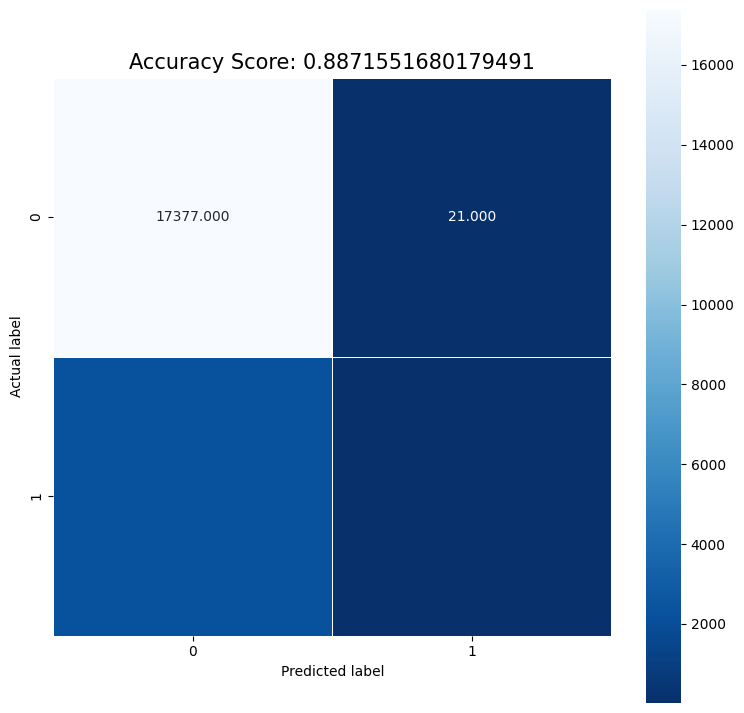

In [51]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Ylog), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logisticreg.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [52]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, Ylog, target_names = ['NO', 'YES']))

              precision    recall  f1-score   support

          NO       0.89      1.00      0.94     17398
         YES       0.50      0.01      0.02      2213

    accuracy                           0.89     19611
   macro avg       0.69      0.50      0.48     19611
weighted avg       0.84      0.89      0.84     19611



In [53]:
# Checking the performance of model using ROC curve plots
YScre = logisticreg.decision_function(Xtest)

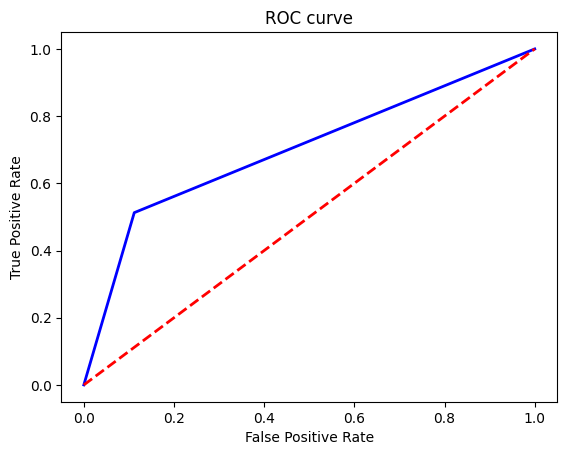

In [54]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve

fpr, tpr,_=roc_curve(logisticreg.predict(Xtrain),Ytrain,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(fpr, tpr, color='blue',
 lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

## Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42,n_estimators=500)
random_forest.fit(Xtrain, Ytrain)
Yrandforest = random_forest.predict(Xtest)

In [56]:
#Calculating the score,
scorey =random_forest.predict_proba(Xtest)[:,1]
rfpr, rtpr, thresholds = roc_curve(Ytest, scorey)

In [57]:
#Checking the accuracy,

print(" Accuracy of Randomeforest classification: ", random_forest.score(Xtest, Ytest))

 Accuracy of Randomeforest classification:  0.8872571515985926


In [58]:
#Printing the confusion matrix,
print(confusion_matrix(Ytest, Yrandforest))

[[17383    15]
 [ 2196    17]]


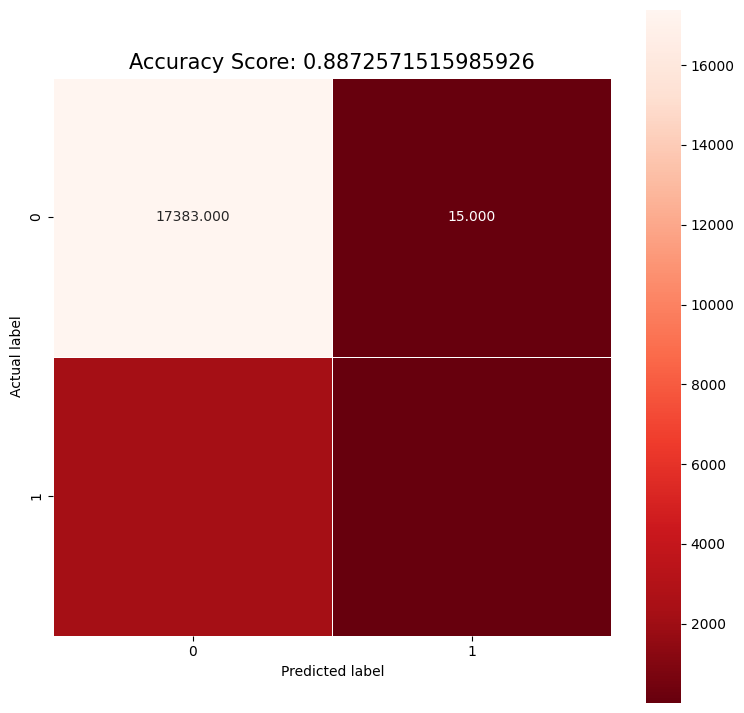

In [59]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Yrandforest), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(random_forest.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [60]:
from sklearn.utils import resample
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,roc_auc_score

In [61]:
n = df.readmitted.value_counts()[0]

# Separate majority and minority classes
df_majority = df[df.readmitted==0]
df_minority = df[df.readmitted==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=n,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
print("The new class count are :")
df_upsampled.readmitted.value_counts()

The new class count are :


readmitted
0    86986
1    86986
Name: count, dtype: int64

In [62]:
X = df_upsampled.drop(["readmitted"],axis = 1)
y = df_upsampled.readmitted
X_train, X_test, y_train, y_test = train_test_split(X, y)



In [63]:
X_train

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
52317,158918856,70680132,1,0,8,1,4,7,2,38,0,11,1,0,2,276,255,267,8,3,3,1,1,2,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1
43830,142335762,42509394,1,1,6,3,6,1,5,10,1,14,0,0,1,120,459,533,6,3,3,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0
89501,328399520,32602608,1,0,7,1,1,7,2,42,0,14,0,0,0,542,512,406,9,3,3,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,1
76627,244318704,51497892,1,0,6,3,22,1,3,28,1,27,0,0,0,500,76,246,5,3,3,2,1,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,2,1,0,0,0,0,1,1
74967,236863464,43861752,1,0,4,3,6,1,8,65,3,33,0,0,0,381,78,370,6,3,3,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40716,132533226,88382925,1,0,6,2,1,7,5,1,0,13,0,0,0,331,79,340,6,3,3,1,2,1,1,1,0,1,1,0,1,1,1,1,0,0,0,0,3,1,0,0,0,0,1,1
17918,67508808,3401055,0,0,4,1,7,7,2,22,1,6,1,0,10,147,378,246,9,3,3,1,1,1,1,1,0,1,2,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1
76657,244527816,71299674,1,1,4,2,1,1,3,46,0,13,0,0,0,382,2,393,9,3,0,1,1,1,1,1,0,1,1,0,2,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1
94979,402620570,43040187,1,0,8,3,1,1,1,44,1,17,2,0,1,120,459,769,3,3,0,2,1,1,1,1,0,2,1,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1


In [64]:
lr = LogisticRegression(solver='newton-cg')
lr.fit(X_train, y_train)

# Predicting on the test data
up_scale_pred = lr.predict(X_test)

#Calculating and printing the f1 score 
f1up_scale_pred = f1_score(y_test, up_scale_pred)
print('f1 score for the testing data:\t', f1up_scale_pred)

# Generate the classification report
report = classification_report(y_test, up_scale_pred)

# Print the report
print(report)

acc_up_scale=accuracy_score(y_test, up_scale_pred)
print("Accuracy of this model:\t\t",acc_up_scale)


f1 score for the testing data:	 0.5620813755873239
              precision    recall  f1-score   support

           0       0.59      0.67      0.63     21842
           1       0.61      0.52      0.56     21651

    accuracy                           0.60     43493
   macro avg       0.60      0.60      0.59     43493
weighted avg       0.60      0.60      0.59     43493

Accuracy of this model:		 0.5971305727358426


In [65]:
n = df.readmitted.value_counts()[1]

# Separate majority and minority classes

df_majority = df[df.readmitted==0]
df_minority = df[df.readmitted==1]

 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=n,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
print("The new class count are:")
print(df_downsampled.readmitted.value_counts())

The new class count are:
readmitted
0    11066
1    11066
Name: count, dtype: int64


In [66]:
# Separate input features (X) and target variable (y)
y = df_downsampled.readmitted
X = df_downsampled.drop(['readmitted'], axis=1)
 
# Train model
Ir = LogisticRegression().fit(X, y)
 
# Predict on training set
down_scale_pred = lr.predict(X)
 
print("How many class does the model predict?",np.unique( down_scale_pred ))
print("Count in each class:\t\t\t","0 :",len(down_scale_pred[down_scale_pred==0]))
print("\t\t\t\t\t 1 :",len(down_scale_pred[down_scale_pred==1]))

#Calculating and printing the f1 score 
f1down_scale_pred = f1_score(y, down_scale_pred)
print('f1 score for the testing data:\t\t', f1down_scale_pred)

Confx = confusion_matrix(y, down_scale_pred)
      
acc_down_scale=accuracy_score(y, down_scale_pred) 
print("Accuracy of the model:\t\t\t", acc_down_scale)
Confx

How many class does the model predict? [0 1]
Count in each class:			 0 : 12771
					 1 : 9361
f1 score for the testing data:		 0.5618054535663582
Accuracy of the model:			 0.5955629857220315


array([[7443, 3623],
       [5328, 5738]], dtype=int64)

In [67]:
from joblib import dump, load

# Save the model
dump(Ir, 'Ir.joblib')

['Ir.joblib']